In [1]:
import numpy as np
import torch 

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Torch checker stuff, ignore, this my trouble shooting code and I thought people might care

# Check if PyTorch is installed
print("PyTorch version:", torch.__version__)

# Check if CUDA (GPU support) is available
cuda_available = torch.cuda.is_available()
print("CUDA available:", cuda_available)

if cuda_available:
    print("CUDA version:", torch.version.cuda)
    print("GPU Device Name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Running on CPU.")


PyTorch version: 1.12.1+cu102
CUDA available: False
CUDA is not available. Running on CPU.


In [ ]:
from keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
#Cuts here are to reduce memory usage (Batch size can also help with this but that will be later)
test_x = train_x[10000:15000]
test_y = train_y[10000:15000]

train_x = train_x[:10000]
train_y = train_y[:10000]



print(train_x.shape) #Images are 28 by 28
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)



(10000, 28, 28)
(10000,)
(5000, 28, 28)
(5000,)


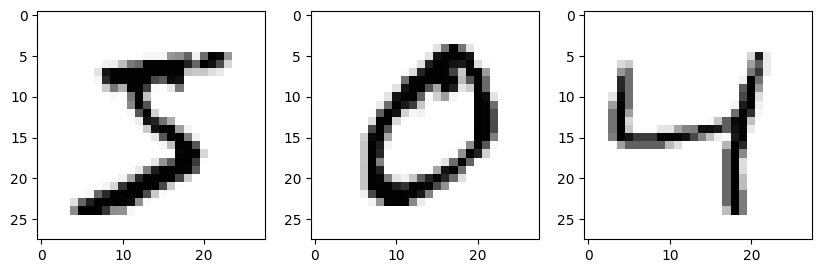

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))

plt.subplot(1,3,1)
plt.imshow(train_x[0], cmap = 'Greys')

plt.subplot(1,3,2)
plt.imshow(train_x[1], cmap = 'Greys')

plt.subplot(1,3,3)
plt.imshow(train_x[2], cmap = 'Greys')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Flatted x before scaling data, dont forget to scale test x as well if you choose to do this

#Flattened example: train_x = np.reshape(train_x, (train_x.shape[0], 28*28))


#Unflatten: train_x = np.reshape(train_x, (train_x.shape[0], 28, 28))

In [ ]:
train_features = np.reshape(train_x, (10000, 1, 28, 28))

test_features = np.reshape(test_x, (5000, 1, 28, 28))

In [ ]:
train_features = torch.from_numpy(train_features).float()
train_targets = torch.from_numpy(train_y).long()



test_features = torch.from_numpy(test_features).float()
test_targets = torch.from_numpy(test_y).long()



In [ ]:
print(train_features.shape) #Number of images, number of channels, height, width

print(test_features.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([5000, 1, 28, 28])


In [ ]:
class CNN(torch.nn.Module):
    def __init__(self, in_dim, final_dim):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Conv2d(in_channels=in_dim, out_channels=__, kernel_size=_, stride=_, padding=_)
        

        

        self.final = torch.nn.Linear(_______, final_dim)
    def forward(self, x):
        out = self.layer1(x)
        #Flattening
        
        check = out.view(-1,______)
        
        out = torch.nn.functional._________(self.final(check))
        return out

In [ ]:
# Fix the random seed so that model performance is reproducible
torch.manual_seed(55)

# Initialize your CNN model
model = CNN(_______, __________)

# Define learning rate, epoch and batchsize for mini-batch gradient
learning_rate = ___________
epochs = ________


# Define loss function and optimizer
loss_func = torch.nn.____________
optimizer = torch.optim.________(model.parameters(), lr=learning_rate)

model

CNN(
  (layer1): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
  (final): Linear(in_features=23328, out_features=10, bias=True)
)

In [ ]:
#Track Values
train_loss_list = []
validation_accuracy_list = np.zeros((epochs,))

In [ ]:
#Training

for epoch in range(0, epochs):
    optimizer.zero_grad()
    train_outputs = model(train_features)
    loss = loss_func(train_outputs, train_targets)

    loss.backward()
    optimizer.step()
    train_loss_list.append(loss.item())

In [ ]:
import seaborn as sns
#Plot values
plt.figure(figsize = (15, 9))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
plt.xlabel("iterations")




In [ ]:
with torch.no_grad():
    test_predict = model(test_features)
    test_correct = (torch.argmax(test_predict, dim=1) == test_targets).type(torch.FloatTensor)
    print("Testing Accuracy:", test_correct.mean().numpy()*100, "%")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b2f1c0f-9f6a-4425-b9f0-35780f9a8c66' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>